In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df = df[df['MSISDN/Number'].notna()]

In [5]:
df = df[df['Bearer Id'].notna()]

In [6]:
df = df.reset_index()

In [7]:
num_cols = []
categorical_cols = []

In [8]:
def sort_cols(data):


    for i in data.columns:
        if data[i].dtypes == "object":
            categorical_cols.append(i)
        else :
            num_cols.append(i)

In [9]:
sort_cols(df)

In [10]:
def fix_cat_cols(data,cat_columns):
    for i in cat_columns:
        data[i] = data[i].fillna(data[i].mode()[0])

In [11]:
fix_cat_cols(df,categorical_cols)

In [12]:
def fix_num_cols(data,num_columns):
    for i in num_columns:
        data[i] = data[i].fillna(data[i].mean())

In [13]:
fix_num_cols(df,num_cols)

# Task 2

In [14]:
df['Total_volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [15]:
df['Session frequency'] = df.groupby(['Bearer Id'])['Dur. (ms)'].transform('count')

In [16]:
df['Session frequency'].value_counts()

1     122552
2      19568
3       4503
4       1200
5        355
6        150
7         84
9         36
8         32
16        16
10        10
Name: Session frequency, dtype: int64

In [17]:
df['Session frequency'].value_counts().nlargest(10)

1     122552
2      19568
3       4503
4       1200
5        355
6        150
7         84
9         36
8         32
16        16
Name: Session frequency, dtype: int64

In [18]:
groups = []

In [19]:
new_df = df.loc[df['Session frequency']!=9, :]

In [20]:
new_df1 = new_df.loc[df["Session frequency"]!=8,:]

In [21]:
new_df1

,index,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,1
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,1
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,1
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,1
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148501,149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,...,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0,872761860.0,1
148502,149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0,631804110.0,1
148503,149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0,705783925.0,1
148504,149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0,627698629.0,2


## Task 2.1

In [22]:
user_per_MSISDN = new_df1.groupby(['Session frequency',"Dur. (ms)",'Total_volume (Bytes)']).agg({'MSISDN/Number':'count'}).reset_index()

In [23]:
X = df[['Session frequency','Dur. (ms)','Total_volume (Bytes)']]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = ["Session frequency","Dur. (ms)",'Total_volume (Bytes)']
X[col_names] = scaler.fit_transform(X[col_names])

C:\Users\CLASSISH\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [25]:
df[col_names]

,Session frequency,Dur. (ms),Total_volume (Bytes)
0,1,1823652.0,345629377.0
1,1,1365104.0,707185356.0
2,1,1361762.0,307690973.0
3,1,1321509.0,889352748.0
4,1,1089009.0,607681403.0
...,...,...,...
148501,1,59587.0,872761860.0
148502,1,81230.0,631804110.0
148503,1,97970.0,705783925.0
148504,2,98249.0,627698629.0


In [26]:
df.describe()

,index,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency
count,148506.000000,1.485060e+05,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,...,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000
mean,75154.149597,1.014676e+19,499.205143,498.640196,1.050841e+05,2.082016e+14,4.190654e+10,4.850068e+13,106.199942,17.628232,...,1.162724e+07,1.100190e+07,4.220642e+08,8.289600e+06,4.211525e+08,8.262685e+06,4.111937e+07,4.546640e+08,4.957834e+08,1.240327
std,43278.817266,2.893262e+18,288.563193,288.070129,8.107274e+04,1.524347e+10,2.450976e+12,2.243217e+13,529.634755,76.469058,...,6.724994e+06,6.357930e+06,2.440043e+08,4.781967e+06,2.431639e+08,4.768806e+06,1.127844e+07,2.441791e+08,2.444146e+08,0.638478
min,0.000000,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,2.895611e+07,1.000000
25%,37802.250000,7.349883e+18,250.000000,251.000000,5.824875e+04,2.082014e+14,3.365131e+10,3.546071e+13,35.000000,3.000000,...,5.778898e+06,5.476774e+06,2.104765e+08,4.130680e+06,2.103042e+08,4.144179e+06,3.321828e+07,2.431263e+08,2.845286e+08,1.000000
50%,75063.500000,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572231e+13,54.000000,7.000000,...,1.164238e+07,1.099937e+07,4.234669e+08,8.291650e+06,4.218618e+08,8.266016e+06,4.114196e+07,4.559408e+08,4.969225e+08,1.000000
75%,112689.750000,1.304243e+19,749.000000,749.000000,1.329328e+05,2.082018e+14,3.368352e+10,8.611970e+13,106.199942,17.628232,...,1.747092e+07,1.650285e+07,6.332750e+08,1.243226e+07,6.316338e+08,1.238049e+07,4.903252e+07,6.657542e+08,7.065677e+08,1.000000
max,149999.000000,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,9.559848e+08,16.000000


In [27]:
kmeans = KMeans(
    init= "random",
    n_clusters = 3,
    n_init= 10,
    max_iter= 300,
    random_state= 42
)

In [28]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [29]:
X['labels'] = kmeans.labels_

C:\Users\CLASSISH\AppData\Local\Temp/ipykernel_5532/3168574615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = kmeans.labels_


In [30]:
X

,Session frequency,Dur. (ms),Total_volume (Bytes),labels
0,-0.376407,21.197923,-0.614343,1
1,-0.376407,15.541897,0.864935,2
2,-0.376407,15.500675,-0.769565,1
3,-0.376407,15.004168,1.610258,2
4,-0.376407,12.136364,0.457822,2
...,...,...,...,...
148501,-0.376407,-0.561190,1.542378,2
148502,-0.376407,-0.294231,0.556518,2
148503,-0.376407,-0.087749,0.859201,2
148504,1.189822,-0.084308,0.539721,0


In [31]:
#X = df[['Session frequency','Dur. (ms)','Youtube DL (Bytes)']]

In [32]:
df['label'] = X["labels"]

In [33]:
X1 = df[df.label==1]

In [34]:
X2 = df[df.label==2]

In [35]:
X0 = df[df.label==0]

In [36]:
X1.describe()

,index,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency,label
count,62207.000000,6.220700e+04,62207.000000,62207.000000,6.220700e+04,6.220700e+04,6.220700e+04,6.220700e+04,62207.000000,62207.000000,...,6.220700e+04,6.220700e+04,6.220700e+04,6.220700e+04,6.220700e+04,6.220700e+04,6.220700e+04,6.220700e+04,62207.000000,62207.0
mean,74862.158230,9.716084e+18,500.344704,499.916344,1.082072e+05,2.082015e+14,4.790955e+10,4.693193e+13,111.509565,16.586185,...,1.091606e+07,2.135315e+08,8.229722e+06,4.210747e+08,8.221617e+06,4.085831e+07,2.459342e+08,2.867925e+08,1.000804,1.0
std,43367.477262,2.857046e+18,288.191531,287.358715,8.486092e+04,2.349978e+10,3.537779e+12,2.152394e+13,617.491407,70.548186,...,6.356338e+06,1.246611e+08,4.772333e+06,2.430906e+08,4.771312e+06,1.128686e+07,1.246581e+08,1.245928e+08,0.028340,0.0
min,0.000000,6.917538e+18,0.000000,0.000000,7.267000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,2.260000e+02,2.516000e+03,5.900000e+01,6.178800e+04,1.045000e+03,5.276726e+06,8.827082e+06,2.895611e+07,1.000000,1.0
25%,36463.500000,7.277826e+18,252.000000,254.000000,5.774750e+04,2.082010e+14,3.365087e+10,3.543831e+13,34.000000,3.000000,...,5.398164e+06,1.053892e+08,4.081750e+06,2.104327e+08,4.105793e+06,3.295114e+07,1.379513e+08,1.793518e+08,1.000000,1.0
50%,76039.000000,7.349883e+18,501.000000,502.000000,8.640000e+04,2.082015e+14,3.366367e+10,3.568081e+13,52.000000,6.000000,...,1.085181e+07,2.129244e+08,8.214529e+06,4.218703e+08,8.210049e+06,4.086959e+07,2.456668e+08,2.868736e+08,1.000000,1.0
75%,112102.000000,1.304243e+19,750.000000,750.000000,1.392990e+05,2.082018e+14,3.368376e+10,3.594831e+13,106.199942,17.628232,...,1.639564e+07,3.202940e+08,1.233066e+07,6.305374e+08,1.233931e+07,4.870950e+07,3.529087e+08,3.938570e+08,1.000000,1.0
max,149992.000000,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082099e+14,8.823971e+14,9.900120e+13,96923.000000,5607.000000,...,2.201184e+07,4.771639e+08,1.655856e+07,8.434425e+08,1.655882e+07,7.833131e+07,4.966832e+08,5.175355e+08,2.000000,1.0


In [37]:
X0.describe()

,index,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency,label
count,22517.000000,2.251700e+04,22517.000000,22517.000000,2.251700e+04,2.251700e+04,2.251700e+04,2.251700e+04,22517.000000,22517.000000,...,2.251700e+04,2.251700e+04,2.251700e+04,2.251700e+04,2.251700e+04,2.251700e+04,2.251700e+04,2.251700e+04,22517.000000,22517.0
mean,76330.565084,1.223492e+19,498.328241,499.710707,9.147385e+04,2.082016e+14,3.367634e+10,5.585244e+13,90.009956,21.278637,...,1.098024e+07,3.716148e+08,8.254311e+06,4.207417e+08,8.258245e+06,4.100627e+07,4.041101e+08,4.451163e+08,2.432384,0.0
std,43057.082416,2.028281e+18,289.481156,289.180371,6.486308e+04,1.214064e+09,4.449604e+07,2.498635e+13,285.843408,65.544849,...,6.343928e+06,2.164628e+08,4.803622e+06,2.432974e+08,4.787074e+06,1.124934e+07,2.164308e+08,2.165003e+08,0.930148,0.0
min,43.000000,6.917538e+18,0.000000,0.000000,7.189000e+03,2.082003e+14,3.360100e+10,1.304701e+12,10.000000,0.000000,...,3.408000e+03,5.087800e+04,2.280000e+02,1.432000e+04,1.480000e+02,4.338786e+06,7.114041e+06,3.109335e+07,2.000000,0.0
25%,40428.000000,1.304243e+19,248.000000,249.000000,6.105300e+04,2.082014e+14,3.365834e+10,3.553821e+13,40.000000,5.000000,...,5.443605e+06,1.865541e+08,4.081094e+06,2.099484e+08,4.118630e+06,3.309260e+07,2.196477e+08,2.614703e+08,2.000000,0.0
50%,71044.000000,1.304243e+19,497.000000,497.000000,8.639900e+04,2.082015e+14,3.366408e+10,3.586511e+13,59.000000,15.000000,...,1.099530e+07,3.693736e+08,8.216385e+06,4.234660e+08,8.264416e+06,4.105374e+07,4.021463e+08,4.442536e+08,2.000000,0.0
75%,116776.000000,1.311448e+19,751.000000,752.000000,9.771800e+04,2.082018e+14,3.368502e+10,8.637690e+13,106.199942,21.000000,...,1.644289e+07,5.517681e+08,1.244060e+07,6.298996e+08,1.240636e+07,4.891454e+07,5.840926e+08,6.251915e+08,3.000000,0.0
max,149999.000000,1.318654e+19,999.000000,999.000000,1.392232e+06,2.082099e+14,3.379000e+10,9.900120e+13,26971.000000,4226.000000,...,2.201189e+07,8.432856e+08,1.655879e+07,8.434385e+08,1.655766e+07,7.605242e+07,8.992126e+08,9.517755e+08,16.000000,0.0


In [38]:
X2.describe()

,index,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_volume (Bytes),Session frequency,label
count,63782.000000,6.378200e+04,63782.000000,63782.000000,6.378200e+04,6.378200e+04,6.378200e+04,6.378200e+04,63782.000000,63782.000000,...,6.378200e+04,6.378200e+04,6.378200e+04,6.378200e+04,6.378200e+04,6.378200e+04,6.378200e+04,6.378200e+04,63782.000000,63782.0
mean,75023.619971,9.829613e+18,498.403296,497.017638,1.068429e+05,2.082017e+14,3.895728e+10,4.743531e+13,106.736993,17.355842,...,1.109327e+07,6.432577e+08,8.360457e+06,4.213734e+08,8.304307e+06,4.141391e+07,6.760867e+08,7.175007e+08,1.053103,2.0
std,43264.208410,2.873376e+18,288.601611,288.366761,8.195745e+04,1.375403e+09,1.334251e+12,2.183532e+13,502.285052,85.079433,...,6.363282e+06,1.212006e+08,4.782830e+06,2.431919e+08,4.759611e+06,1.127367e+07,1.212784e+08,1.214115e+08,0.224240,0.0
min,1.000000,6.917538e+18,0.000000,0.000000,7.142000e+03,2.082001e+14,3.360100e+10,1.194901e+12,0.000000,0.000000,...,3.500000e+01,3.907744e+08,2.230000e+02,3.290000e+03,1.560000e+02,2.866892e+06,4.340511e+08,5.007679e+08,1.000000,2.0
25%,37081.500000,7.277826e+18,249.000000,248.000000,5.778225e+04,2.082010e+14,3.365099e+10,3.544411e+13,34.000000,3.000000,...,5.574804e+06,5.388872e+08,4.203590e+06,2.102820e+08,4.191604e+06,3.351406e+07,5.712791e+08,6.119286e+08,1.000000,2.0
50%,76060.000000,7.349883e+18,498.000000,498.000000,8.639900e+04,2.082015e+14,3.366361e+10,3.570631e+13,53.000000,7.000000,...,1.114772e+07,6.476764e+08,8.401226e+06,4.211597e+08,8.319800e+06,4.145579e+07,6.803285e+08,7.213669e+08,1.000000,2.0
75%,112085.750000,1.304243e+19,747.000000,748.000000,1.379785e+05,2.082018e+14,3.368283e+10,3.594971e+13,106.199942,17.628232,...,1.663012e+07,7.499963e+08,1.252065e+07,6.334021e+08,1.240439e+07,4.937994e+07,7.822764e+08,8.238465e+08,1.000000,2.0
max,149997.000000,1.318654e+19,999.000000,999.000000,1.859327e+06,2.082522e+14,3.370000e+14,9.900120e+13,64640.000000,7120.000000,...,2.201196e+07,8.434419e+08,1.655868e+07,8.434301e+08,1.655877e+07,7.745813e+07,9.029696e+08,9.559848e+08,2.000000,2.0


In [39]:
cols_plot = ['Dur. (ms)','Total_volume (Bytes)','Session frequency']

In [40]:
def box_plot(data, columns):
    for cols in columns:
        sns.boxplot(data=data, x= cols )
        plt.show()

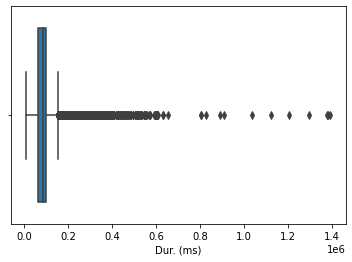

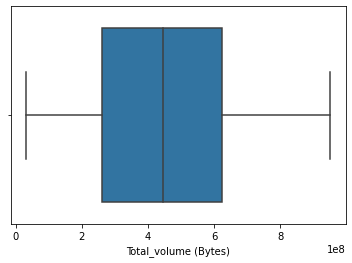

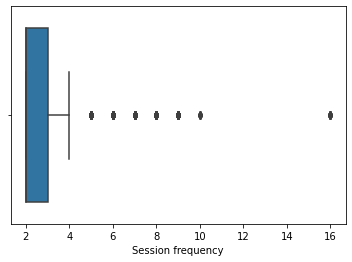

In [41]:
box_plot(data= X0, columns= cols_plot)

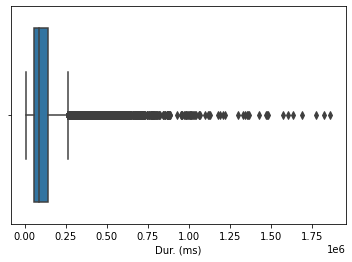

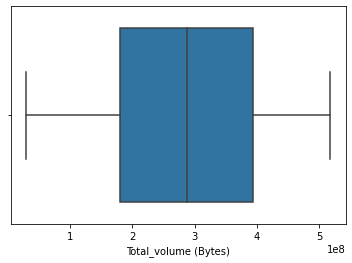

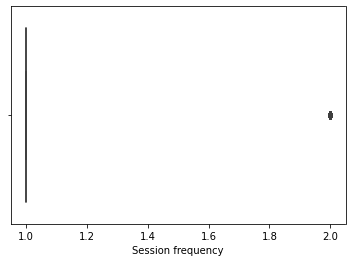

In [42]:
box_plot(X1, cols_plot)

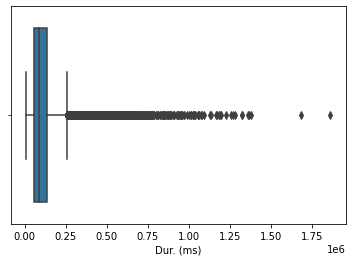

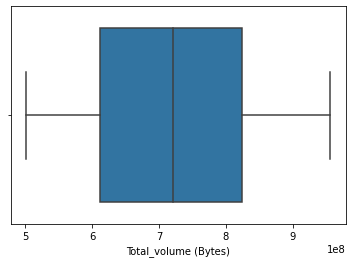

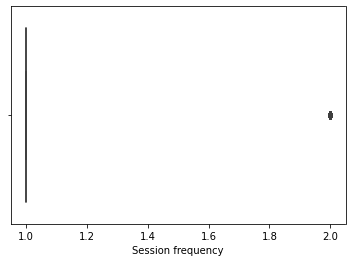

In [43]:
box_plot(X2,cols_plot)

Cluster 1 and 2 are of closer distance than cluster 0 which catches higher values of the metrics and will be located at upper right corner of the graph.

In [44]:
#plt.scatter(X1['Dur. (ms)'],X1['Total_volume (Bytes)'],hue,c='blue')
#plt.scatter(centroids['Dur. (ms)'],centroids['Total_volume (Bytes)'],c='red')
#plt.xlabel('Dur. (ms)')
#plt.ylabel('Total_volume (Bytes)')
#plt.show()

In [45]:
df['Social Media data'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email data'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix data'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming data'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other data'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

In [46]:
df['User per Social'] = df.groupby(['MSISDN/Number'])['Social Media data'].transform('sum')
df['User per Google'] = df.groupby(['MSISDN/Number'])['Google data'].transform('sum')
df['User per Email'] = df.groupby(['MSISDN/Number'])['Email data'].transform('sum')
df['User per Youtube'] = df.groupby(['MSISDN/Number'])['Youtube data'].transform('sum')
df['User per Netflix'] = df.groupby(['MSISDN/Number'])['Netflix data'].transform('sum')
df['User per Gaming'] = df.groupby(['MSISDN/Number'])['Gaming data'].transform('sum')
df['User per Other'] = df.groupby(['MSISDN/Number'])['Other data'].transform('sum')

In [47]:
df

,index,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Netflix data,Gaming data,Other data,User per Social,User per Google,User per Email,User per Youtube,User per Netflix,User per Gaming,User per Other
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,17855187.0,292426453.0,180558843.0,2771612.0,3905804.0,6932608.0,46397870.0,30361399.0,5.189561e+08,4.998505e+08
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,35565545.0,609920783.0,541959383.0,3469123.0,12038408.0,3146166.0,52065276.0,54559509.0,7.903986e+08,1.097356e+09
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,23751202.0,229980251.0,414908351.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,2.299803e+08,4.149084e+08
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,15092588.0,810387875.0,761837216.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,8.103879e+08,7.618372e+08
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,17539799.0,531237049.0,564619822.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148501,149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,...,29618711.0,797160102.0,336273648.0,993175.0,1265634.0,4280107.0,24553645.0,29618711.0,7.971601e+08,3.362736e+08
148502,149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,37561864.0,535806880.0,16751926.0,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,5.358069e+08,1.675193e+07
148503,149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,40643294.0,631628095.0,714638145.0,3503158.0,15877800.0,3246996.0,33312169.0,53796384.0,1.470909e+09,1.494133e+09
148504,149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,15029702.0,566933800.0,132415585.0,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,5.669338e+08,1.324156e+08


In [48]:
User_per_app = ['User per Social','User per Google','User per Email','User per Youtube','User per Netflix','User per Gaming','User per Other']

In [49]:
for i in User_per_app :
    print(df[i].value_counts().nlargest(10))

43374779.0    18
27135500.0    17
28294544.0    17
35412358.0    16
39783189.0    15
19222921.0    15
24247850.0    13
20777205.0    12
23077825.0    12
23974919.0    12
Name: User per Social, dtype: int64
152191852.0    18
127973787.0    17
142307915.0    17
116516345.0    16
123223099.0    15
109860502.0    15
105032696.0    13
110254484.0    12
82738720.0     12
87125921.0     12
Name: User per Google, dtype: int64
42418782.0    18
40633966.0    17
40788634.0    17
35999792.0    16
31514421.0    15
33693767.0    15
30335796.0    13
25576965.0    12
36310123.0    12
23567219.0    12
Name: User per Email, dtype: int64
374483047.0    18
452958769.0    17
394370218.0    17
257991088.0    16
396289198.0    15
317410572.0    15
315231310.0    13
308790774.0    12
303169107.0    12
284090139.0    12
Name: User per Youtube, dtype: int64
328725740.0    18
361401046.0    17
356980607.0    17
399519079.0    16
309093159.0    15
334643269.0    15
313939488.0    13
318347546.0    12
265374262.0 

In [50]:
top_3_apps = ["Gaming data","Other data","Youtube data"]

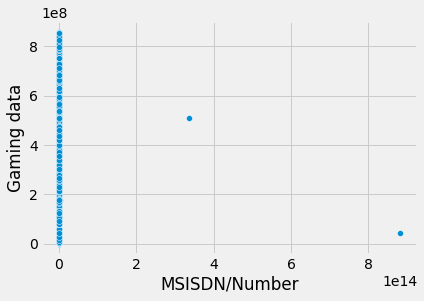

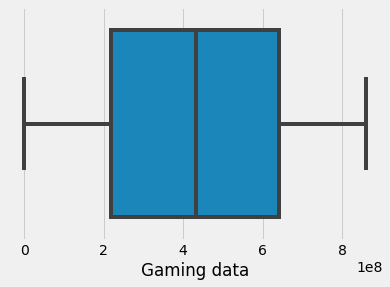

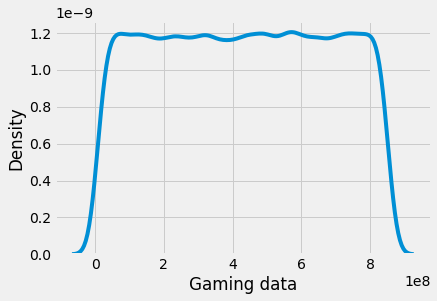

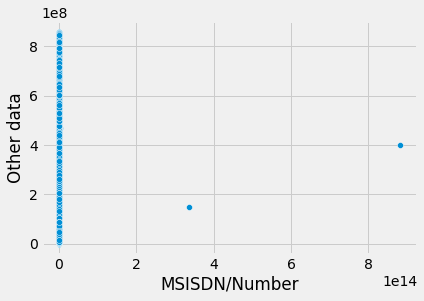

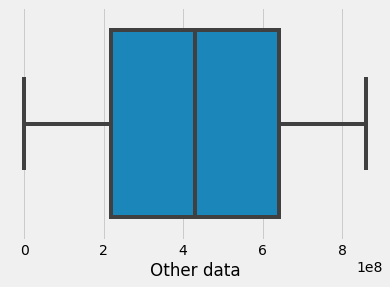

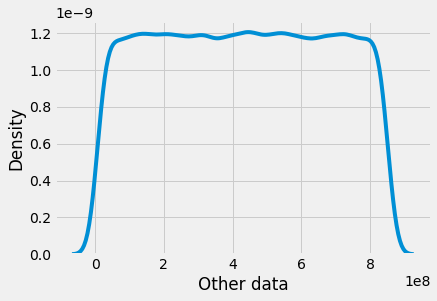

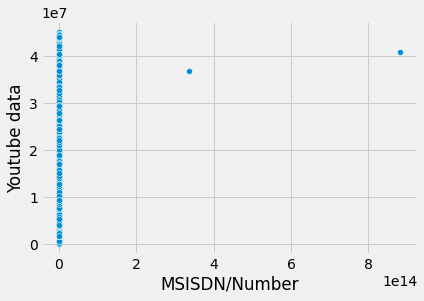

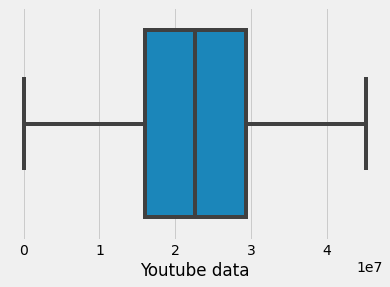

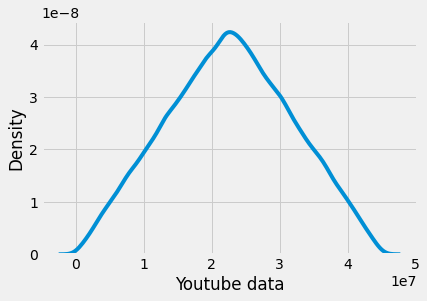

In [57]:
for i in top_3_apps:
    sns.scatterplot(data=df, x='MSISDN/Number',y=i)
    plt.show()
    sns.boxplot(data=df, x= i )
    plt.show()
    sns.kdeplot(data=df, x= i)
    plt.show()

In [52]:
kmeans_kwargs ={
    'init': "random",
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42
}

In [53]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

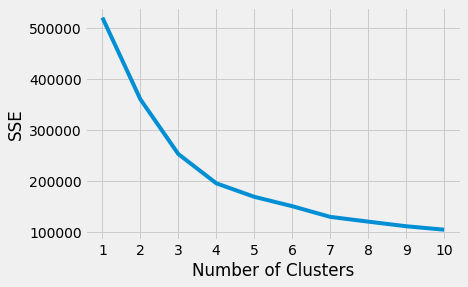

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- The Optimized value for k is 3

- Deduced a steep slope k is from 1 till 3, then the slope starts to flatten out from k = 4 till 10 where the slope stopped